<a href="https://colab.research.google.com/github/BrunoAG77/zelda-database-python/blob/main/switch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados da série de jogos The Legend of Zelda

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, hamming_loss, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR

In [ ]:
data = {
    'id': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    'title': ['The Legend of Zelda','The Adventure of Link','A Link To The Past','Link''s Awakening','Ocarina of Time','Majora''s Mask','Oracle of Seasons','Oracle of Ages','Four Swords','The Wind Waker','Four Swords Adventures','The Minish Cap','Twilight Princess','Phantom Hourglass','Spirit Tracks','Skyward Sword','A Link Between Worlds','Hyrule Warriors','Triforce Heroes','Breath of the Wild','Cadence of Hyrule', 'Hyrule Warriors: Age of Calamity', 'Tears of the Kingdom', 'Echoes of Wisdom'],
    'year': [1987, 1988, 1992, 1993, 1998, 2000, 2001, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2009, 2011, 2013, 2014, 2015, 2017, 2019, 2020, 2023, 2024],
    'console': ['NES','NES','SNES','GB','N64','N64','GBC','GBC','GBA','GC','GC','GBA','Wii','DS','DS','Wii','3DS','Wii U','3DS','Switch','Switch','Switch','Switch','Switch'],
    'rating': [8.4, 7.3, 9.5, 8.7, 9.9, 9.5, 8.7, 8.8, 8.5, 9.6, 8.6, 8.9, 9.5, 9.0, 8.7, 9.3, 9.1, 7.6, 7.2, 9.7, 8.5, 7.8, 9.6, 8.6],
    }

## Exibindo a base de dados


In [ ]:
nintendata = pd.DataFrame(data)
nintendata

,id,title,year,console,rating
0,0,The Legend of Zelda,1987,NES,8.4
1,1,The Adventure of Link,1988,NES,7.3
2,2,A Link To The Past,1992,SNES,9.5
3,3,Links Awakening,1993,GB,8.7
4,4,Ocarina of Time,1998,N64,9.9
5,5,Majoras Mask,2000,N64,9.5
6,6,Oracle of Seasons,2001,GBC,8.7
7,7,Oracle of Ages,2001,GBC,8.8
8,8,Four Swords,2002,GBA,8.5
9,9,The Wind Waker,2003,GC,9.6


## Verificar se a base de dados tem valores **nulos**

In [ ]:
nintendata.isna().sum().sort_values(ascending=False)
nintendata.isnull().sum().sort_values(ascending=False)
nintendata.dropna()
nintendata.dropna(axis=1)
nintendata.drop_duplicates()

,id,title,year,console,rating
0,0,The Legend of Zelda,1987,NES,8.4
1,1,The Adventure of Link,1988,NES,7.3
2,2,A Link To The Past,1992,SNES,9.5
3,3,Links Awakening,1993,GB,8.7
4,4,Ocarina of Time,1998,N64,9.9
5,5,Majoras Mask,2000,N64,9.5
6,6,Oracle of Seasons,2001,GBC,8.7
7,7,Oracle of Ages,2001,GBC,8.8
8,8,Four Swords,2002,GBA,8.5
9,9,The Wind Waker,2003,GC,9.6


##### Não contém valores nulos ou duplicados, então podemos seguir.

## Número de jogos e colunas de categoria


In [ ]:
nintendata.shape #Quantidade de Linhas e Colunas

(24, 5)

In [ ]:
nintendata.columns #Nome das Colunas

Index(['id', 'title', 'year', 'console', 'rating'], dtype='object')

## Análise de Notas

In [ ]:
nintendata[nintendata['rating'] == nintendata['rating'].max()][['title', 'rating']] #Jogo com a melhor nota

,title,rating
4,Ocarina of Time,9.9


In [ ]:
nintendata[nintendata['rating'] == nintendata['rating'].min()][['title', 'rating']] #Jogo com a pior nota

,title,rating
18,Triforce Heroes,7.2


In [ ]:
nintendata['rating'].mean() #Média de Notas

np.float64(8.791666666666666)

In [ ]:
nintendata['rating'].var() #Variância de Notas

0.5590579710144927

In [ ]:
nintendata['rating'].std() #Desvio padrão de Notas

0.7477017928388916

In [ ]:
nintendata[ nintendata.rating <= 9.0 ] #Quais jogos tem uma nota menor que 9.0?

,id,title,year,console,rating
0,0,The Legend of Zelda,1987,NES,8.4
1,1,The Adventure of Link,1988,NES,7.3
3,3,Links Awakening,1993,GB,8.7
6,6,Oracle of Seasons,2001,GBC,8.7
7,7,Oracle of Ages,2001,GBC,8.8
8,8,Four Swords,2002,GBA,8.5
10,10,Four Swords Adventures,2004,GC,8.6
11,11,The Minish Cap,2005,GBA,8.9
13,13,Phantom Hourglass,2007,DS,9.0
14,14,Spirit Tracks,2009,DS,8.7


In [ ]:
mean1 = len(nintendata[ nintendata.rating <= 9.0 ])/len(nintendata)
print(round(mean1*100,2),"%") #Percentual de jogos que possuem nota menor do que 9.0 na base de dados

62.5 %


In [ ]:
nintendata[ nintendata.rating >= 9.0 ] #Quais jogos tem nota maior que 9.0?

,id,title,year,console,rating
2,2,A Link To The Past,1992,SNES,9.5
4,4,Ocarina of Time,1998,N64,9.9
5,5,Majoras Mask,2000,N64,9.5
9,9,The Wind Waker,2003,GC,9.6
12,12,Twilight Princess,2006,Wii,9.5
13,13,Phantom Hourglass,2007,DS,9.0
15,15,Skyward Sword,2011,Wii,9.3
16,16,A Link Between Worlds,2013,3DS,9.1
19,19,Breath of the Wild,2017,Switch,9.7
22,22,Tears of the Kingdom,2023,Switch,9.6


In [ ]:
mean2 = len(nintendata[ nintendata.rating >= 9.0 ])/len(nintendata)
print(round(mean2*100,2),"%") #Percentual de jogos que possuem nota menor do que 9.0 na base de dados

41.67 %


In [ ]:
nintendata['console'].value_counts() #Contagem de quantos jogos tem em cada console

,count
console,
Switch,5
NES,2
GBC,2
N64,2
Wii,2
DS,2
GC,2
GBA,2
3DS,2


In [ ]:
nintendata['console'].value_counts().idxmax() #Qual dos consoles contém mais jogos da base de dados?

'Switch'

In [ ]:
nintendata.describe() #Sumário das operações

,id,year,rating
count,24.000000,24.000000,24.000000
mean,11.500000,2006.333333,8.791667
std,7.071068,10.540467,0.747702
min,0.000000,1987.000000,7.200000
25%,5.750000,2000.750000,8.500000
50%,11.500000,2005.500000,8.750000
75%,17.250000,2014.250000,9.500000
max,23.000000,2024.000000,9.900000


## Gráficos

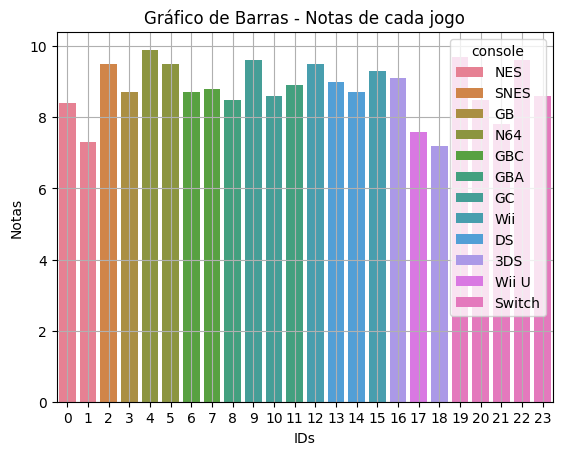

In [ ]:
sns.barplot(x=nintendata['id'], y=nintendata['rating'],hue=nintendata['console'])
plt.title("Gráfico de Barras - Notas de cada jogo")
plt.xlabel("IDs")
plt.ylabel("Notas")
plt.grid()
plt.show()

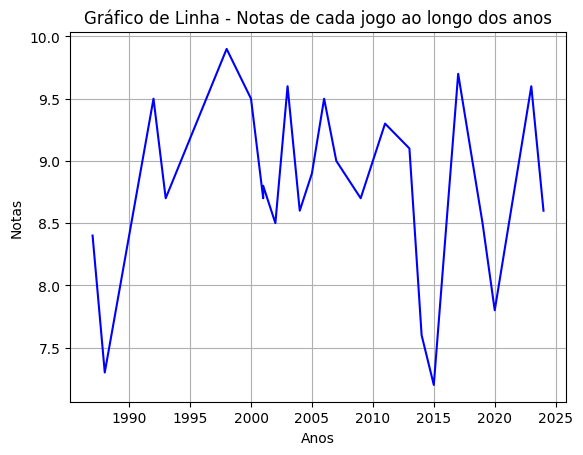

In [ ]:
plt.plot(nintendata['year'],nintendata['rating'],color="blue")
plt.title("Gráfico de Linha - Notas de cada jogo ao longo dos anos")
plt.xlabel("Anos")
plt.ylabel("Notas")
plt.grid()
plt.show()

##### Observando o gráfico de linha, podemos concluir que o pico de notas foi no começo dos anos 2000, no console Nintendo 64, com os jogos The Legend of Zelda: Ocarina of Time e The Legend of Zelda: Majora's Mask, e as notas não chegaram tão perto até os jogos do console Nintendo Switch, com os principais sendo The Legend of Zelda: Breath of the Wild e The Legend of Zelda: Tears of the Kingdom. Spinoffs como Hyrule Warriors não obtiveram a mesma notas que os jogos principais.

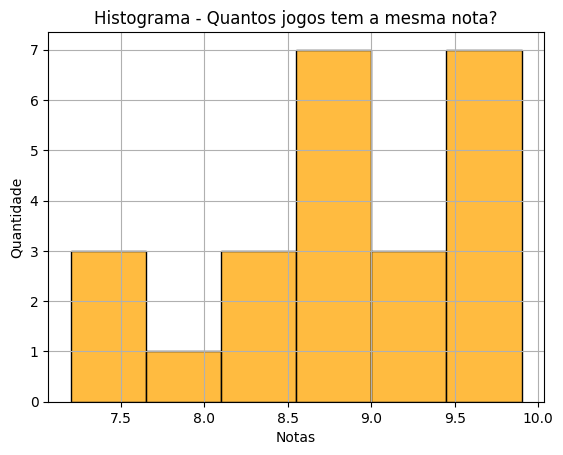

In [ ]:
sns.histplot(nintendata['rating'],color="orange")
plt.title("Histograma - Quantos jogos tem a mesma nota?")
plt.xlabel("Notas")
plt.ylabel("Quantidade")
plt.grid()
plt.show()

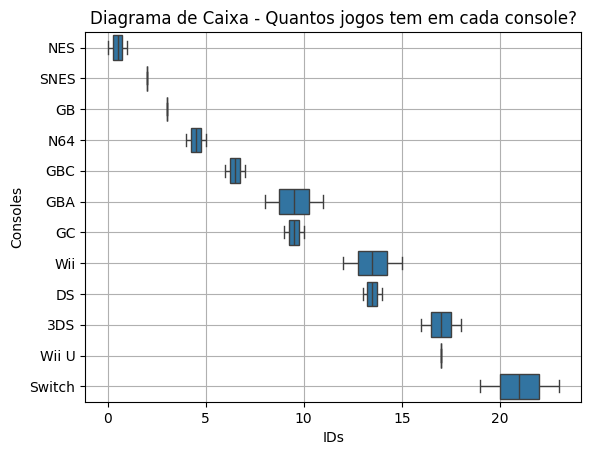

In [ ]:
sns.boxplot(x='id',y='console',data=nintendata)
plt.title("Diagrama de Caixa - Quantos jogos tem em cada console?")
plt.xlabel("IDs")
plt.ylabel("Consoles")
plt.grid()
plt.show()

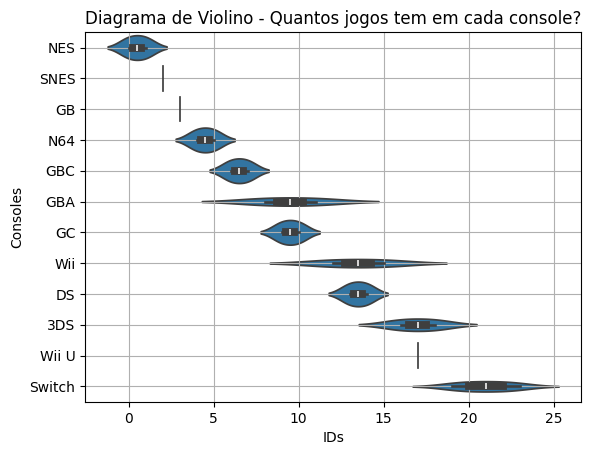

In [ ]:
sns.violinplot(x='id',y='console',data=nintendata)
plt.title("Diagrama de Violino - Quantos jogos tem em cada console?")
plt.xlabel("IDs")
plt.ylabel("Consoles")
plt.grid()
plt.show()

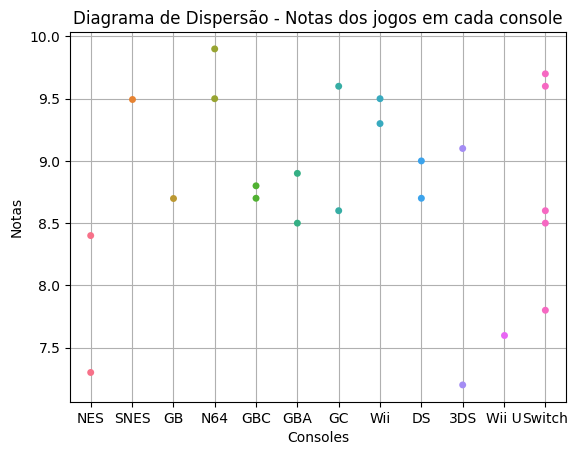

In [ ]:
sns.swarmplot(x=nintendata['console'],y=nintendata['rating'],hue=nintendata['console'])
plt.title("Diagrama de Dispersão - Notas dos jogos em cada console")
plt.xlabel("Consoles")
plt.ylabel("Notas")
plt.grid()
plt.show()

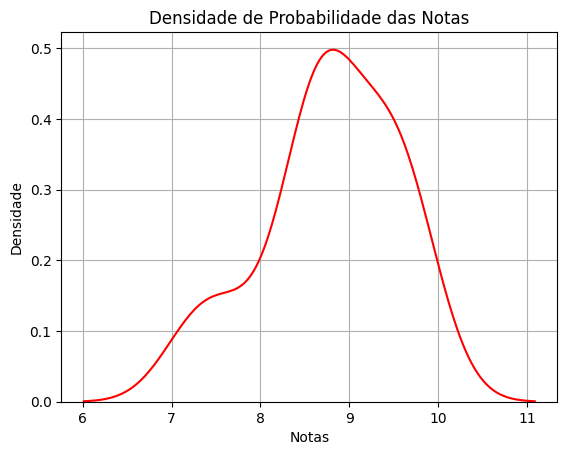

In [ ]:
sns.kdeplot(x='rating',data=nintendata,color="red")
plt.title("Densidade de Probabilidade das Notas")
plt.xlabel("Notas")
plt.ylabel("Densidade")
plt.grid()
plt.show()

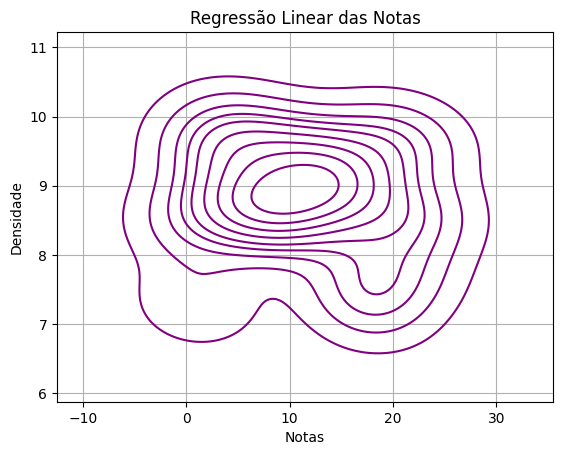

In [ ]:
sns.kdeplot(x='id',y='rating',data=nintendata, color="purple")
plt.title("Regressão Linear das Notas")
plt.xlabel("Notas")
plt.ylabel("Densidade")
plt.grid()
plt.show()

## Machine Learning

### Regressão Linear

In [ ]:
nintendata['console_num'] = LabelEncoder().fit_transform(nintendata['console'])
x = nintendata[['year','console_num']]
y = nintendata['rating']
train1, test1, train2, test2 = train_test_split(x, y, test_size = 0.2, random_state = 42) #Treinos e testes

In [ ]:
linear_model = LinearRegression()
linear_model.fit(train1, train2) #Criação do modelo de regressão linear

LinearRegression()

In [ ]:
preview2 = linear_model.predict(test1) #Previsão do modelo

In [ ]:
mean_squared_error(test2, preview2) #Erro Médio Quadrado

0.7198348517423958

In [ ]:
r2_score(test2, preview2) #Coeficente de Determinação

-0.6449608129396616

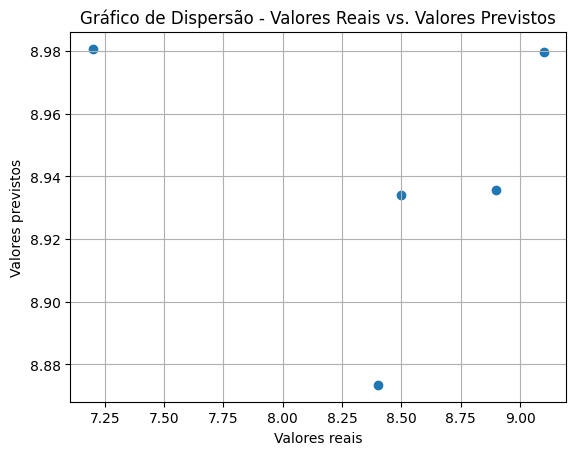

In [ ]:
plt.scatter(test2, preview2)
plt.xlabel("Valores reais")
plt.ylabel("Valores previstos")
plt.title("Gráfico de Dispersão - Valores Reais vs. Valores Previstos")
plt.grid()
plt.show()

### Regressão Logística

In [ ]:
nintendata['consolenum'] = LabelEncoder().fit_transform(nintendata['console'])
nintendata['rating_category'] = pd.cut(nintendata['rating'], bins=(0,7.25,9.0,10.0), labels=['B','A','S'])
x = nintendata[['year','consolenum']]
y = nintendata['rating_category']
y_binario = y.apply(lambda c: 'Alta' if c == 'S' else 'Baixa')
train3, test3, train4, test4 = train_test_split(x, y_binario, test_size = 0.9, random_state = 42, stratify=y_binario) #Treinos e testes

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(train3, train4) #Criação do modelo de regressão linear

LogisticRegression()

In [ ]:
preview4 = logistic_model.predict(test3) #Previsão do modelo

In [ ]:
mat = confusion_matrix(test4, preview4) #Matriz de confusão
mat

array([[5, 3],
       [9, 5]])

In [ ]:
accuracy_matrix = accuracy_score(test4, preview4) #Acurácia da matriz de confusão
print(accuracy_matrix * 100,"%")

45.45454545454545 %


In [ ]:
precision_matrix_micro = precision_score(test4, preview4, average='micro') #Precisão da matriz de confusão, usando 'micro' para obter o total de acertos globais, sendo o mesmo valor que a acurácia
print(precision_matrix_micro * 100,"%")

45.45454545454545 %


In [ ]:
recall_matrix_micro = recall_score(test4, preview4, average='micro') #Revocação da matriz de confusão, usando 'micro' para obter o total de acertos globais, sendo o mesmo valor que a acurácia
print(recall_matrix_micro * 100,"%")

45.45454545454545 %


In [ ]:
precision_matrix_macro = precision_score(test4, preview4, average='macro') #Precisão da matriz de confusão, usando 'macro' para calcular uma média simples entre as classificações
print(precision_matrix_macro * 100,"%")

49.10714285714286 %


In [ ]:
recall_matrix_macro = recall_score(test4, preview4, average='macro') #Precisão da matriz de confusão, usando 'macro' para calcular uma média simples entre as classificações
print(recall_matrix_macro * 100,"%")

49.10714285714286 %


In [ ]:
precision_matrix_weighted = precision_score(test4, preview4, average='weighted') #Precisão da matriz de confusão, usando 'weighted' para calcular uma média ponderada entre as classificações
print(precision_matrix_weighted * 100,"%")

52.75974025974026 %


In [ ]:
recall_matrix_weighted = recall_score(test4, preview4, average='weighted') #Precisão da matriz de confusão, usando 'weighted' para calcular uma média ponderada entre as classificações
print(recall_matrix_weighted * 100,"%")

45.45454545454545 %


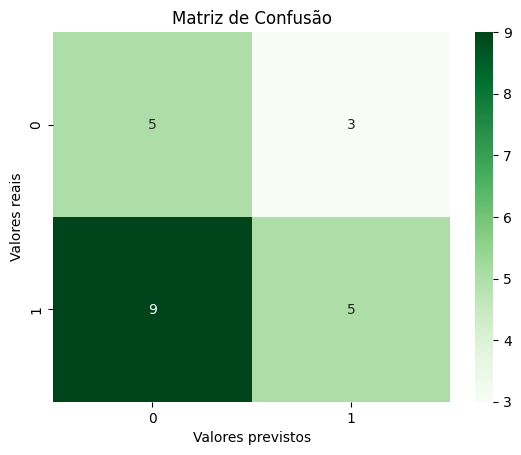

In [ ]:
sns.heatmap(mat, annot=True, cmap='Greens')
plt.title("Matriz de Confusão")
plt.xlabel("Valores previstos")
plt.ylabel("Valores reais")
plt.show()

In [ ]:
train3 = StandardScaler().fit_transform(train3)
test3 = StandardScaler().fit_transform(test3) #Padronização dos dados

In [ ]:
cross_val_score(logistic_model, x, y, cv=10) #Validação cruzada

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/mod

array([0.33333333, 0.66666667, 0.66666667, 0.66666667, 0.5       ,
       0.5       , 0.5       , 0.        , 0.5       , 0.5       ])

In [ ]:
dt_model = tree.DecisionTreeClassifier(max_depth=5)
dt_model.fit(train3, train4) #Criação do modelo de árvore de decisão

DecisionTreeClassifier(max_depth=5)

In [ ]:
dtpreview4 = dt_model.predict(test3) #Previsão do modelo de árvore de decisão

In [ ]:
accuracy_tree = accuracy_score(test4, dtpreview4) #Acurácia da árvore de decisão
print(accuracy_tree * 100,"%")

45.45454545454545 %


In [ ]:
precision_tree_macro = precision_score(test4, dtpreview4, average='macro') #Precisão da árvore de decisão, usando 'macro' para calcular uma média simples entre as classificações
print(precision_tree_macro * 100,"%")

44.166666666666664 %


In [ ]:
recall_tree_macro = recall_score(test4, dtpreview4, average='macro') #Revocação da árvore de decisão, usando 'macro' para calcular uma média simples entre as classificações
print(recall_tree_macro * 100,"%")

43.75 %


In [ ]:
precision_tree_weighted = precision_score(test4, dtpreview4, average='weighted') #Precisão da árvore de decisão, usando 'weighted' para calcular uma média ponderada entre as classificações
print(precision_tree_weighted * 100,"%")

48.03030303030304 %


In [ ]:
recall_tree_weighted = recall_score(test4, dtpreview4, average='weighted') #Revocação da árvore de decisão, usando 'weighted' para calcular uma média ponderada entre as classificações
print(recall_tree_weighted * 100,"%")

45.45454545454545 %


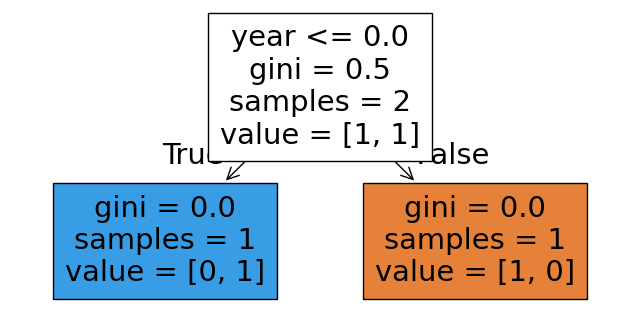

In [ ]:
plt.figure(figsize=(8,4))
tree.plot_tree(dt_model, filled=True, feature_names=['year','consolenum'])
plt.show() #Gráfico da árvore de decisão

In [ ]:
rfl_model = RandomForestClassifier(n_estimators=100, random_state=50)
rfl_model.fit(train3, train4) #Criação de modelo de árvores aleatórias

RandomForestClassifier(random_state=50)

In [ ]:
rflpreview4 = rfl_model.predict(test3) #Previsão do modelo de árvores aleatórias

In [ ]:
accuracy_random = accuracy_score(test4, rflpreview4) #Acurácia do modelo de árvores aleatórias
print(accuracy_random * 100,"%")

68.18181818181817 %


In [ ]:
precision_random_macro = precision_score(test4, rflpreview4, average='macro') #Precisão da árvores aleatórias, usando 'macro' para calcular uma média simples entre as classificações
print(precision_random_macro * 100,"%")

68.18181818181819 %


In [ ]:
recall_random_macro = recall_score(test4, rflpreview4, average='macro') #Precisão da árvores aleatórias, usando 'macro' para calcular uma média simples entre as classificações
print(recall_random_macro * 100,"%")

69.64285714285714 %


In [ ]:
precision_random_weighted = precision_score(test4, rflpreview4, average='weighted') #Precisão da árvores aleatórias, usando 'weighted' para calcular uma média ponderada entre as classificações
print(precision_random_weighted * 100,"%")

71.900826446281 %


In [ ]:
recall_random_weighted = recall_score(test4, rflpreview4, average='macro') #Precisão da árvores aleatórias, usando 'weighted' para calcular uma média ponderada entre as classificações
print(recall_random_weighted * 100,"%")

69.64285714285714 %


In [ ]:
report_matrix = classification_report(test4, preview4)
print(report_matrix) #Relatório de classificação, contendo a precisão, revocação e o f1-score (fórmula entre precisão e revocação)

              precision    recall  f1-score   support

        Alta       0.36      0.62      0.45         8
       Baixa       0.62      0.36      0.45        14

    accuracy                           0.45        22
   macro avg       0.49      0.49      0.45        22
weighted avg       0.53      0.45      0.45        22



In [ ]:
report_tree = classification_report(test4, dtpreview4)
print(report_tree) #Relatório de classificação, contendo a precisão, revocação e o f1-score (fórmula entre precisão e revocação)

              precision    recall  f1-score   support

        Alta       0.30      0.38      0.33         8
       Baixa       0.58      0.50      0.54        14

    accuracy                           0.45        22
   macro avg       0.44      0.44      0.44        22
weighted avg       0.48      0.45      0.46        22



In [ ]:
report_random = classification_report(test4, rflpreview4)
print(report_random) #Relatório de classificação, contendo a precisão, revocação e o f1-score (fórmula entre precisão e revocação)

              precision    recall  f1-score   support

        Alta       0.55      0.75      0.63         8
       Baixa       0.82      0.64      0.72        14

    accuracy                           0.68        22
   macro avg       0.68      0.70      0.68        22
weighted avg       0.72      0.68      0.69        22



##### Pelas acurácias e métricas obtidas, podemos determinar que o melhor modelo para esta base de dados é o modelo de árvores aleatórias ou RandomForest. Por se tratar de uma base de dados pequena, é esperado que os valores das métricas não sejam tão altos.